# Imports and CSV to Data Frame

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import datetime

In [113]:
PATH = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv'
data_frame_unsorted = pd.read_csv(PATH)

# Extract a Date Column from Timestamp 
Use to_datetime and dt.date

In [140]:
data_frame_unsorted['timestamp'] = pd.to_datetime(data_frame_unsorted['timestamp'], infer_datetime_format=True)
data_frame_unsorted['date'] = data_frame_unsorted['timestamp'].dt.date

data_frame_unsorted.head(5)


,user_id,timestamp,group,landing_page,converted,date
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21


# Sorting the Data

In [141]:
data_frame = data_frame_unsorted.sort_values(by='timestamp', ascending = True)

# Understanding the Data

In [142]:
data_frame.info()
data_frame.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 129422 to 191060
Data columns (total 6 columns):
user_id         290585 non-null int64
timestamp       290585 non-null datetime64[ns]
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
date            290585 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 15.5+ MB


,user_id,timestamp,group,landing_page,converted,date
129422,922696,2017-01-02 13:42:05.378582,treatment,new_page,0,2017-01-02
182382,781507,2017-01-02 13:42:15.234051,control,old_page,0,2017-01-02
82715,737319,2017-01-02 13:42:21.786186,control,old_page,0,2017-01-02
101321,818377,2017-01-02 13:42:26.640581,treatment,new_page,0,2017-01-02
156631,725857,2017-01-02 13:42:27.851110,treatment,new_page,0,2017-01-02


# Separating the Data Frame

In [143]:
control_data_frame = data_frame.loc[data_frame['group'] == 'control']
treatment_data_frame = data_frame.loc[data_frame['group'] == 'treatment']

# Understanding the Separated Data Frames

In [144]:
control_size = len(control_data_frame.loc[control_data_frame['group'] == 'control', ['group']])
treatment_size = len(treatment_data_frame.loc[treatment_data_frame['group'] == 'treatment', ['group']])
control_converts = len(control_data_frame.loc[control_data_frame['converted'] == 1])
treatment_converts = len(treatment_data_frame.loc[treatment_data_frame['converted'] == 1]) 

print('There are {} in the control group and {} coverts, for a {} conversion ratio.'.format(control_size, control_converts, round(control_converts / control_size, 4)))
print('There are {} in the treatment group and {} coverts, for a {} conversion ratio.'.format(treatment_size, treatment_converts, round(treatment_converts / treatment_size, 4)))

There are 145274 in the control group and 17489 coverts, for a 0.1204 conversion ratio.
There are 145311 in the treatment group and 17264 coverts, for a 0.1188 conversion ratio.


Both of these are large sample sizes and addequate in size. 

# T Testing and P Values

In [145]:
control_group_converts = control_data_frame.loc[control_data_frame['group'] == 'control', ['converted']]
treatment_group_converts = treatment_data_frame.loc[treatment_data_frame['group'] == 'treatment', ['converted']]

stats.ttest_ind(control_group_converts, treatment_group_converts)

Ttest_indResult(statistic=array([1.3116069]), pvalue=array([0.18965384]))

# Visualizing Differences in Data Frames

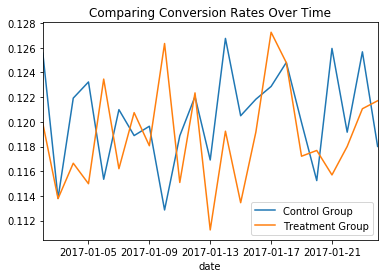

In [146]:
fig = control_data_frame[['date', 'converted']].groupby('date').mean().plot()
treatment_data_frame[['date', 'converted']].groupby('date').mean().plot(ax=fig)

plt.legend(['Control Group','Treatment Group'])
plt.title('Comparing Conversion Rates Over Time')
plt.show()

# T Test by Date

In [147]:
unique_dates = data_frame.loc[data_frame['group']!= 'nothing',['date']]
unique_dates.head(5)

,date
129422,2017-01-02
182382,2017-01-02
82715,2017-01-02
101321,2017-01-02
156631,2017-01-02


In [162]:
p_value_list = []
t_stat_list = []
date_list = []
for date in data_frame['date'].unique():
    control_data = control_data_frame.loc[control_data_frame['date']==date]
    treatment_data = treatment_data_frame.loc[treatment_data_frame['date']==date]
    t_and_p = stats.ttest_ind(control_data['converted'], treatment_data['converted'])
    p_value = t_and_p.pvalue
    ttest = t_and_p.statistic
    p_value_list.append(p_value)
    t_stat_list.append(ttest)
    date_list.append(date)
    



# Visualizing T Test by Date

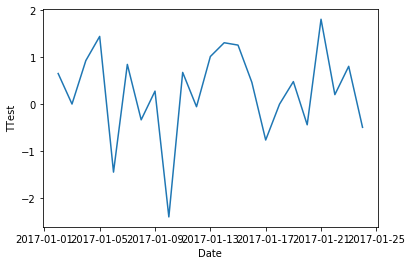

In [166]:
plt.plot(date_list, t_stat_list)
plt.xlabel("Date")
plt.ylabel("TTest")
plt.show()

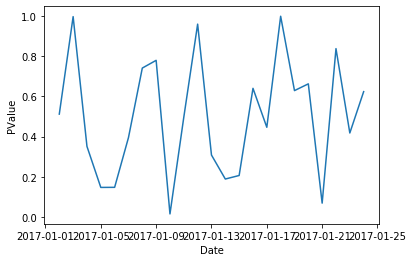

In [167]:
plt.plot(date_list, p_value_list)

plt.xlabel("Date")
plt.ylabel("PValue")
plt.show()

There are changes over time, but not a noticible trend. The conversion differences between the control and treatment groups are not large enough to say that there is a statistical difference. 